In [1]:
import os
from tqdm import tqdm
from utils.file_utils import load_dataset
df = load_dataset()
df

,Speaker,Topic,combined
0,Michael Macy,Opportunities and challenges for computational...,Speaker: Michael Macy; Topic: Opportunities an...
1,Jure Leskovec,Structure and dynamics of information propagation,Speaker: Jure Leskovec; Topic: Structure and d...
2,"Omar Guerrero, Eduardo Lopez, Robert Axtell",Labor flows and unemployment mediated by networks,"Speaker: Omar Guerrero, Eduardo Lopez, Robert ..."
3,Duncan Watts,An experimental study of collective self-organ...,Speaker: Duncan Watts; Topic: An experimental ...
4,Matthew Jackson,Multiplexing and the interaction between borro...,Speaker: Matthew Jackson; Topic: Multiplexing ...
...,...,...,...
2744,"Qiankun Zhong, Seth Frey",The strength of selection and drift in the evo...,"Speaker: Qiankun Zhong, Seth Frey; Topic: The ..."
2745,"Charlie Pilgrim, Weisi Guo, Thomas Hills",Information Foraging and the Attention Economy,"Speaker: Charlie Pilgrim, Weisi Guo, Thomas Hi..."
2746,"Cameron Raymond, Isaac Waller, Ashton Anderson",Measuring Alignment of Online Grassroots Polit...,"Speaker: Cameron Raymond, Isaac Waller, Ashton..."
2747,"Suman Kalyan Maity, Yang Wang, Victoria Medvec...","Winners, Losers, and Future Achievement","Speaker: Suman Kalyan Maity, Yang Wang, Victor..."


In [2]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
# from llama_index.core import VectorStoreIndex
from llama_index.core import Settings

Settings.embed_model = HuggingFaceEmbedding(
    model_name="BAAI/bge-small-en-v1.5"
)

In [6]:
hugging_face_embedding = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")
df['embedding'] = [hugging_face_embedding.get_text_embedding(text) for text in tqdm(df.combined)]
df.embedding



100%|██████████| 2747/2747 [05:29<00:00,  8.33it/s]


0       [0.008549642749130726, 0.03466722369194031, -0...
1       [-0.022083023563027382, -0.01946137845516205, ...
2       [-0.04951334744691849, 0.01099439151585102, -0...
3       [-0.019985321909189224, -0.01202864944934845, ...
4       [-0.030174631625413895, -0.02889847941696644, ...
                              ...                        
2744    [-0.05771690234541893, 0.01030723750591278, -0...
2745    [-0.037504974752664566, 0.00837234128266573, 0...
2746    [-0.05028660222887993, -0.018318377435207367, ...
2747    [-0.05707608163356781, 0.04585738852620125, 0....
2748    [-0.05343949422240257, 0.01737862080335617, -0...
Name: embedding, Length: 2747, dtype: object

In [8]:
saveTo = os.path.abspath("data/llama.css_speaker_topic_embeddings.csv")
df.to_csv(saveTo)
print(f'Saved to {saveTo}')

Saved to C:\data\around-work\academinc-work\2025\css\data\llama.css_speaker_topic_embeddings.csv


4it [00:00, 24.17it/s]


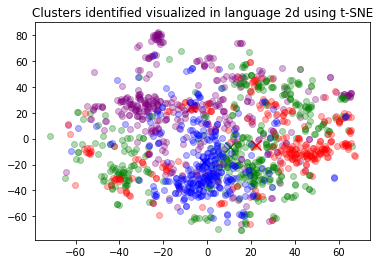

In [9]:
from ast import literal_eval
import numpy as np
import pandas as pd

from utils.embeddings import plot

ext_emb_path = os.path.abspath("data/llama.css_speaker_topic_embeddings.csv")
ext_emb = pd.read_csv(ext_emb_path)

ext_emb["embedding"] = ext_emb.embedding.apply(literal_eval).apply(np.array)  # convert string to numpy array
plot(ext_emb, 9)


4it [00:00, 47.64it/s]


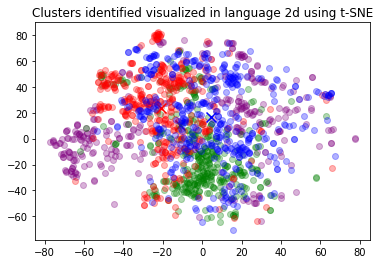

In [10]:
from utils.embeddings import plot
plot(df, 7)


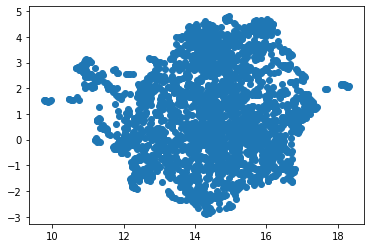

In [13]:
import umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(n_components=2)
embeddings_2d = reducer.fit_transform(df.embedding.to_list())

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])


C:\Users\p.pardela\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.02


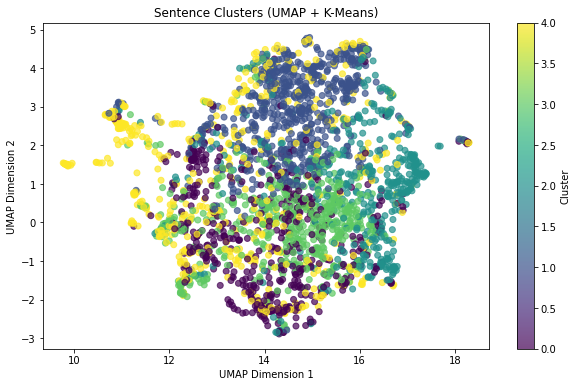

### Cluster Summary ###
 Cluster 0: 506 sentences
 - Example sentences: ['Speaker: Matthieu Cristelli, Andrea Tacchella, Luciano Pietronero; Topic: Measuring the intangible growth potential of countries: weather-like forecasting for economics', 'Speaker: Katarzyna Growiec, Jakub Growiec; Topic: The impact of bridging and bonding social capital on individual earnings: evidence for an inverted U', 'Speaker: Per Engstrom, Eskil Forsell; Topic: Demand effects of consumers’ stated and revealed preferences']

Cluster 1: 677 sentences
 - Example sentences: ['Speaker: Marcella Tambuscio, Giancarlo Ruffo, Alessandro Flammini, Filippo Menczer; Topic: Fact-checking effect on viral hoaxes: a model of misinformation spread in social networks', 'Speaker: Venkata Rama, Ingmar Weber, Sonya Dal Cin; Topic: From “I love you babe” to “leave me alone”-romantic relationship breakups on Twitter', 'Speaker: Kazutoshi Sasahara; Topic: Emergence of novel collective phenomena in Twitter']

Cluster 2: 459 senten

In [15]:
from sklearn.metrics import silhouette_score

embeddings = df.embedding.to_list()
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)

df['cluster'] = kmeans.fit_predict(embeddings)

silhouette_avg = silhouette_score(embeddings, df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Sentence Clusters (UMAP + K-Means)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

summary = []
for cluster in sorted(df['cluster'].unique()):
    cluster_sentences = df[df['cluster'] == cluster]['combined'].tolist()
    sample_sentences = cluster_sentences[:3]  # Show first 3 examples
    summary.append(f"Cluster {cluster}: {len(cluster_sentences)} sentences")
    summary.append(f" - Example sentences: {sample_sentences}\n")

summary_text = "\n".join(summary)
print("### Cluster Summary ###\n", summary_text)
